<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号 第1特集 Pythonではじめる統計学

## 第1章 統計分析に必須のライブラリ


### リスト1

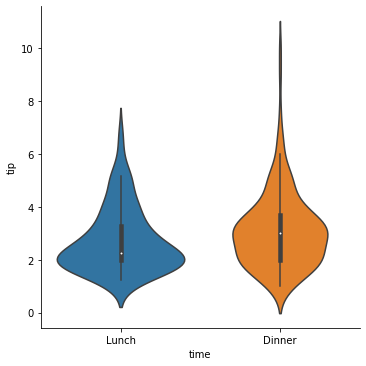

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.catplot(
    data=tips, x="time", y="tip", kind="violin"
)

### リスト2

標本空間が $\{a_1, \dotsc, a_n\}$ であるとき、その算術平均 $(\displaystyle A)$ は次のとおりに定義される。

$$A = \frac{1}{n}\sum_{k=1}^{n} a_k = \frac{a_1 + a_2 + \dotsb + a_n}{n}$$


### NumPy入門

#### ndarray型

In [2]:
import numpy as np

int_arr = np.array([1, 2])

In [3]:
int_arr.dtype

dtype('int64')

In [4]:
float_arr = np.array([1, 2], dtype=np.float32)

In [5]:
float_arr.dtype

dtype('float32')

In [6]:
float_arr.astype(np.int)

array([1, 2])

#### ndarrayオブジェクト生成

In [7]:
np.arange(3)

array([0, 1, 2])

In [8]:
np.arange(0, 2.5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. ])

In [9]:
np.zeros(3)

array([0., 0., 0.])

In [10]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [11]:
np.random.seed(1)
np.random.rand(3,3)

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01, 3.96767474e-01]])

In [12]:
arr1 = np.arange(1, 4)
arr1

array([1, 2, 3])

In [13]:
arr2 = np.arange(1, 13).reshape(4, 3)
arr2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

#### 要素へのアクセス

In [14]:
arr1[0]

1

In [15]:
arr1[1:3]

array([2, 3])

In [16]:
arr2[0]

array([1, 2, 3])

In [17]:
arr2[1, 2]

6

In [18]:
arr2[0, 1:3]

array([2, 3])

In [19]:
arr1[1] = 10
arr1

array([ 1, 10,  3])

In [20]:
arr2[1, :2] = 100
arr2

array([[  1,   2,   3],
       [100, 100,   6],
       [  7,   8,   9],
       [ 10,  11,  12]])

#### ブロードキャスト

In [21]:
li = [1, 2, 3]
[x + 1 for x in li]

[2, 3, 4]

In [22]:
arr1 = np.array([1, 2, 3])
arr1 + 1

array([2, 3, 4])

In [23]:
# 前述のコードから続けてそのまま動かすと、テキストと異なる結果になる
# 恐らく、arr2を途中で変えたことを忘れたか、無視したものと考えられる
# このため、テキストにはないが改めてarr2の初期化を行う
arr2 = np.arange(1, 13).reshape(4, 3)
arr1 + arr2

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12],
       [11, 13, 15]])

#### 関数の適用

In [24]:
np.power(arr1, arr2)

array([[     1,      4,     27],
       [     1,     32,    729],
       [     1,    256,  19683],
       [     1,   2048, 531441]])

In [25]:
abs(np.array([1, -2, 3]))

array([1, 2, 3])

In [26]:
sum(np.array([1, 2, 3]))

6

In [27]:
def my_func(x):
  return x ** 2 + 1

my_func(arr1)

array([ 2,  5, 10])

### pandas入門

#### Series型

In [28]:
import pandas as pd

ser = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser

a    1
b    2
c    3
dtype: int64

In [29]:
ser.values

array([1, 2, 3])

#### DataFrame型

In [30]:
pd.DataFrame(
    [[1, 10], [2, 20]],
    index=["r1", "r2"],
    columns=["c1", "c2"]
)

,c1,c2
r1,1,10
r2,2,20


In [31]:
diff_types_df = pd.DataFrame(
    [[0.1, 1], [0.2, 2]]
)
diff_types_df.dtypes

0    float64
1      int64
dtype: object

In [32]:
diff_types_df.values.dtype

dtype('float64')

#### 要素へのアクセス

In [33]:
rc_df = pd.DataFrame(
    [
     ["r1c1", "r1c2", "r1c3"],
     ["r2c1", "r2c2", "r2c3"],
     ["r3c1", "r3c2", "r3c3"]
    ],
    index=["r1", "r2", "r3"],
    columns=["c1", "c2", "c3"]
)
rc_df

,c1,c2,c3
r1,r1c1,r1c2,r1c3
r2,r2c1,r2c2,r2c3
r3,r3c1,r3c2,r3c3


#### ラベルからアクセス(locインデクサ)

In [34]:
ser.loc["b"]

2

In [35]:
rc_df.loc["r2", "c2"]

'r2c2'

In [36]:
rc_df.loc["r2":"r3", :]

,c1,c2,c3
r2,r2c1,r2c2,r2c3
r3,r3c1,r3c2,r3c3


In [37]:
rc_df.loc[["r1", "r3"], ["c1", "c3"]]

,c1,c3
r1,r1c1,r1c3
r3,r3c1,r3c3


#### 位置からアクセス(ilocインデクサ)

In [38]:
ser.iloc[1]

2

In [39]:
rc_df.iloc[1, 2]

'r2c3'

In [40]:
rc_df.iloc[1:, [0, 2]]

,c1,c3
r2,r2c1,r2c3
r3,r3c1,r3c3


#### 要素の変更

In [41]:
ser.loc["b"] = 22
ser

a     1
b    22
c     3
dtype: int64

In [42]:
rc_df.loc["r1", "c1"] = "R1C1"
rc_df

,c1,c2,c3
r1,R1C1,r1c2,r1c3
r2,r2c1,r2c2,r2c3
r3,r3c1,r3c2,r3c3


In [43]:
rc_df.iloc[1, 1] = "R2C2"
rc_df

,c1,c2,c3
r1,R1C1,r1c2,r1c3
r2,r2c1,R2C2,r2c3
r3,r3c1,r3c2,r3c3


#### ブロードキャスト

In [44]:
float_ser = pd.Series([1.1, 2.2, 3.3])
int_df = pd.DataFrame(
    [
     [1, 10, 100],
     [2, 20, 200],
     [3, 30, 300]
    ],
)
int_df

,0,1,2
0,1,10,100
1,2,20,200
2,3,30,300


In [45]:
float_ser + 1

0    2.1
1    3.2
2    4.3
dtype: float64

In [46]:
int_df + 1

,0,1,2
0,2,11,101
1,3,21,201
2,4,31,301


In [47]:
int_df + float_ser

,0,1,2
0,2.1,12.2,103.3
1,3.1,22.2,203.3
2,4.1,32.2,303.3


#### 関数の適用

In [48]:
round(float_ser)

0    1.0
1    2.0
2    3.0
dtype: float64

In [49]:
import numpy as np

np.median(float_ser)

2.2

In [50]:
def my_func(x):
  return x ** 2 + 1

my_func(float_ser)

0     2.21
1     5.84
2    11.89
dtype: float64

In [51]:
float_ser.apply(np.floor)

0    1.0
1    2.0
2    3.0
dtype: float64

In [52]:
int_df.apply(sum)

0      6
1     60
2    600
dtype: int64

In [53]:
int_df.apply(sum, axis=1)

0    111
1    222
2    333
dtype: int64

#### 基本統計量

In [55]:
np.random.seed(1)
random_ser = pd.Series(np.random.rand(100))
random_df = pd.DataFrame(
    np.random.rand(100, 4),
    columns=["A", "B", "C", "D"],
)

In [56]:
random_ser.describe()

count    100.000000
mean       0.485878
std        0.295885
min        0.000114
25%        0.209834
50%        0.470743
75%        0.721743
max        0.988861
dtype: float64

In [57]:
random_df.describe()

,A,B,C,D
count,100.000000,100.000000,100.000000,100.000000
mean,0.512182,0.512229,0.497681,0.533416
std,0.282876,0.299402,0.309680,0.299485
min,0.013952,0.010364,0.000402,0.003018
25%,0.260161,0.264233,0.219065,0.266053
50%,0.530040,0.510404,0.533171,0.559521
75%,0.790094,0.780124,0.771148,0.797880
max,0.974740,0.997323,0.993913,0.990472
